In [1]:
import sys
sys.path.append('../src')
import pandas as pd
import numpy as np
import scorecardpy as sc
import matplotlib.pyplot as plt
from main import convert_to_dummy, create_category_buckets, calculate_woe_iv

In [2]:
application = pd.read_csv('../data/labeled_application.csv')
credit = pd.read_csv('../data/labeled_credit.csv')
application.isna().sum()

id                         0
gender                     0
own_car                    0
own_estate                 0
num_children               0
income_total               0
income_type                0
education_type             0
family_status              0
housing_type               0
age_days                   0
employed_days              0
mobile_flag                0
work_phone                 0
phone                      0
email_flag                 0
occupation            134203
num_family_members         0
label                      0
dtype: int64

In [3]:
application.occupation.fillna('unknown', inplace=True)
labeled_application = application[application['label'] != 'new']
labeled_application['label'] = pd.to_numeric(labeled_application['label'], errors='coerce')
labeled_application['label'] = labeled_application['label'].astype('int8')
len(labeled_application)

C:\Users\alexe\AppData\Local\Temp\ipykernel_6168\1384592471.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  application.occupation.fillna('unknown', inplace=True)
C:\Users\alexe\AppData\Local\Temp\ipykernel_6168\1384592471.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labeled_a

36457

In [4]:
application['gender'] = application['gender'].replace(['M','F'],[0,1])
application['own_car'] = application['own_car'].replace(['N','Y'],[0,1])
application['own_estate'] = application['own_estate'].replace(['N','Y'],[0,1])

C:\Users\alexe\AppData\Local\Temp\ipykernel_6168\11864843.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  application['gender'] = application['gender'].replace(['M','F'],[0,1])
C:\Users\alexe\AppData\Local\Temp\ipykernel_6168\11864843.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  application['own_car'] = application['own_car'].replace(['N','Y'],[0,1])
C:\Users\alexe\AppData\Local\Temp\ipykernel_6168\11864843.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To r

In [8]:
application.income_type.value_counts()

income_type
Working                 226104
Commercial associate    100757
Pensioner                75493
State servant            36186
Student                     17
Name: count, dtype: int64

In [12]:
application.housing_type.value_counts()

housing_type
House / apartment      393831
With parents            19077
Municipal apartment     14214
Rented apartment         5974
Office apartment         3922
Co-op apartment          1539
Name: count, dtype: int64

In [5]:
application.loc[application['num_children'] >= 2,'num_children']='2More'
print(application['num_children'].value_counts(sort=False))

num_children
0        304071
1         88527
2More     45959
Name: count, dtype: int64


C:\Users\alexe\AppData\Local\Temp\ipykernel_16332\988970362.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2More' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  application.loc[application['num_children'] >= 2,'num_children']='2More'


(1.937, 36.23]        418920
(36.23, 69.849]        18266
(69.849, 103.468]        954
(103.468, 137.088]       286
(137.088, 170.708]        29
(170.708, 204.327]        55
(204.327, 237.946]         7
(237.946, 271.566]         0
(271.566, 305.186]         0
(305.186, 338.805]        11
(338.805, 372.424]         0
(372.424, 406.044]        12
(406.044, 439.664]         0
(439.664, 473.283]        10
(473.283, 506.903]         0
(506.903, 540.522]         0
(540.522, 574.142]         0
(574.142, 607.761]         0
(607.761, 641.381]         0
(641.381, 675.0]           7
Name: count, dtype: int64


<Axes: ylabel='Frequency'>

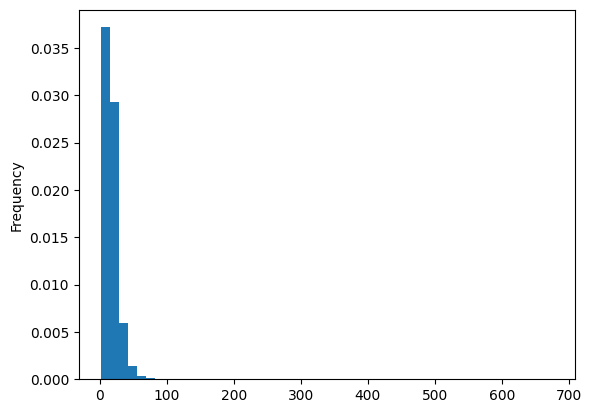

In [6]:
application['income_total']=application['income_total'].astype(object)
application['income_total'] = application['income_total']/10000 
print(application['income_total'].value_counts(bins=20, sort=False))
application['income_total'].plot(kind='hist',bins=50,density=True)

In [7]:
application = create_category_buckets(application,'income_total', 5, ["lowest","low","medium","high","highest"])

(19.95, 24.9]    0.023436
(24.9, 29.8]     0.108816
(29.8, 34.7]     0.137553
(34.7, 39.6]     0.147235
(39.6, 44.5]     0.142346
(44.5, 49.4]     0.115303
(49.4, 54.3]     0.114286
(54.3, 59.2]     0.106636
(59.2, 64.1]     0.088463
(64.1, 69.0]     0.015925
Name: proportion, dtype: float64


<Axes: ylabel='Frequency'>

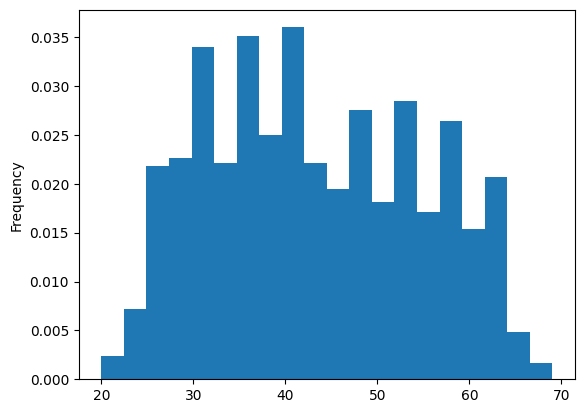

In [8]:
application['age_y']=-(application['age_days'])//365	
print(application['age_y'].value_counts(bins=10,normalize=True,sort=False))
application['age_y'].plot(kind='hist',bins=20,density=True)

In [9]:
application = create_category_buckets(application,'age_y',5, ["yongest","young","middle","old","oldest"])

C:\Users\alexe\AppData\Local\Temp\ipykernel_16332\1353257541.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  application['employed_y'].fillna(application['employed_y'].mean(),inplace=True) #replace na by mean


<Axes: ylabel='Frequency'>

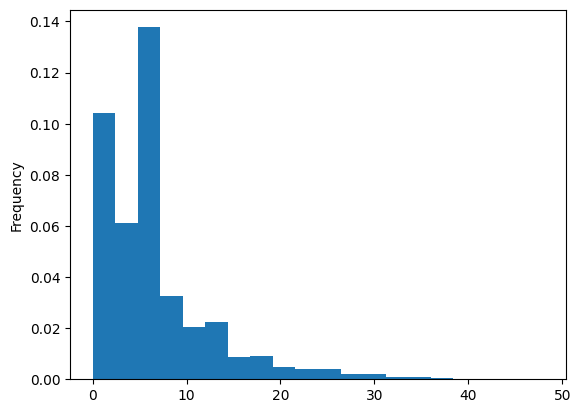

In [10]:
application['employed_y']=-(application['employed_days'])//365
application.loc[application['income_type'] == 'Pensioner', 'employed_y'] = np.nan
application.loc[(application['employed_y'] < 0) & (application['income_type'] != 'Pensioner'), 'employed_y'] = np.nan
application['employed_y'].fillna(application['employed_y'].mean(),inplace=True) #replace na by mean
application['employed_y'].plot(kind='hist',bins=20,density=True)

In [11]:
application = create_category_buckets(application,'employed_y',5, ["lowest","low","medium","high","highest"])

In [12]:
application.loc[application['num_family_members'] >= 4,'num_family_members']='4More'

C:\Users\alexe\AppData\Local\Temp\ipykernel_16332\1291721972.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4More' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  application.loc[application['num_family_members'] >= 4,'num_family_members']='4More'


In [13]:
print(application['income_type'].value_counts(sort=False))
application.loc[application['income_type'] == 'Pensioner','income_type']='State servant'
application.loc[application['income_type'] == 'Student','income_type']='State servant'

income_type
Working                 226104
Commercial associate    100757
Pensioner                75493
State servant            36186
Student                     17
Name: count, dtype: int64


In [14]:
application.occupation.value_counts()

occupation
unknown                  134203
Laborers                  78240
Core staff                43007
Sales staff               41098
Managers                  35487
Drivers                   26090
High skill tech staff     17289
Accountants               15985
Medicine staff            13520
Cooking staff              8076
Security staff             7993
Cleaning staff             5845
Private service staff      3456
Low-skill Laborers         2140
Secretaries                2044
Waiters/barmen staff       1665
Realty agents              1041
HR staff                    774
IT staff                    604
Name: count, dtype: int64

In [15]:
application.loc[(application['occupation']=='Cleaning staff') | (application['occupation']=='Cooking staff')
                | (application['occupation']=='Drivers') | (application['occupation']=='Laborers') |
                (application['occupation']=='Low-skill Laborers') | (application['occupation']=='Security staff') | 
                (application['occupation']=='Waiters/barmen staff'),'occupation']='Labor Work'

application.loc[(application['occupation']=='Accountants') | (application['occupation']=='Core staff') |
                (application['occupation']=='HR staff') | (application['occupation']=='Medicine staff') |
                (application['occupation']=='Private service staff') | (application['occupation']=='Realty agents') |
                (application['occupation']=='Sales staff') | (application['occupation']=='Secretaries'),'occupation']='Office Work'

application.loc[(application['occupation']=='Managers') | (application['occupation']=='High skill tech staff') | (application['occupation']=='IT staff'),'occupation']='High Tech Work'

In [16]:
categorical_vars = ['gender', 'own_car', 'own_estate', 'num_children', 'income_type',
                    'education_type', 'family_status', 'housing_type', 'mobile_flag', 
                    'work_phone', 'phone', 'email_flag', 'occupation', 
                    'num_family_members', 'gp_income_total', 'gp_age_y', 'gp_employed_y']

# Filter application data to include the categorical variables and the label
labeled_data = application[application['label'] != 'new']
df = labeled_data[categorical_vars + ['label']]

# Ensure label column is numeric
df['label'] = pd.to_numeric(df['label'], errors='coerce')

# Initialize dictionary to store IV values
iv_dict = {}

# Calculate IV for each categorical variable
for var in categorical_vars:
    _, iv = calculate_woe_iv(df, 'label', var)
    iv_dict[var] = iv

# Convert the IV values into a DataFrame and sort by IV
iv_df = pd.DataFrame(list(iv_dict.items()), columns=['variable', 'info_value'])
iv_sorted = iv_df.sort_values(by='info_value', ascending=False)
pd.options.display.float_format = '{:.6f}'.format
# Display the IV values sorted by their importance
print(iv_sorted)

C:\Users\alexe\AppData\Local\Temp\ipykernel_16332\3422707233.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = pd.to_numeric(df['label'], errors='coerce')
c:\Desktop\loan_approve\notebooks\../src\main.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[feature] = data[feature].astype(str)  # Convert to string if not already
c:\Desktop\loan_approve\notebooks\../src\main.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

              variable  info_value
16       gp_employed_y    0.049631
6        family_status    0.030119
2           own_estate    0.028349
15            gp_age_y    0.024542
7         housing_type    0.015711
0               gender    0.013581
5       education_type    0.009209
13  num_family_members    0.007332
12          occupation    0.003404
4          income_type    0.002390
9           work_phone    0.001865
14     gp_income_total    0.001742
1              own_car    0.001144
3         num_children    0.000748
11          email_flag    0.000366
10               phone    0.000150
8          mobile_flag    0.000000


c:\Desktop\loan_approve\notebooks\../src\main.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[feature] = data[feature].astype(str)  # Convert to string if not already
c:\Desktop\loan_approve\notebooks\../src\main.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[feature] = data[feature].astype(str)  # Convert to string if not already
c:\Desktop\loan_approve\notebooks\../src\main.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [20]:
# List of categorical variables to convert to dummies
dummy_vars = ['num_children', 'income_type', 'education_type', 'family_status', 
              'housing_type', 'occupation', 'num_family_members', 
              'gp_income_total', 'gp_age_y', 'gp_employed_y']

# Apply the convert_to_dummy function for each categorical variable
for var in dummy_vars:
    application = convert_to_dummy(application, var)

In [24]:
application.to_csv('../data/engineered_labeled_applications.csv')